## Problem 1: Practices of Python, Numpy, Scikit Learn (25%)

Go through the Python, Numpy, Scikit Learn Colab tutorial introduced by TA in class.

## Problem 2: Polynomial Regression (25%)

In this problem, you will implement the function for second-order polynomial regression (quadratic equation) of (a) single variable and (b) two variable.
You can find the detials of the solution using least square error method in the course slide.





In [1]:
# import the necessary library
import numpy as np
import matplotlib.pyplot as plt

(a) Fitting Quadratic Function with Single Variable

The equation shown below is taken from the course slide. Please reference the course slide for more details.

You will need to constuct the **B** matrix and **c** vector to solve the **a** in your code.

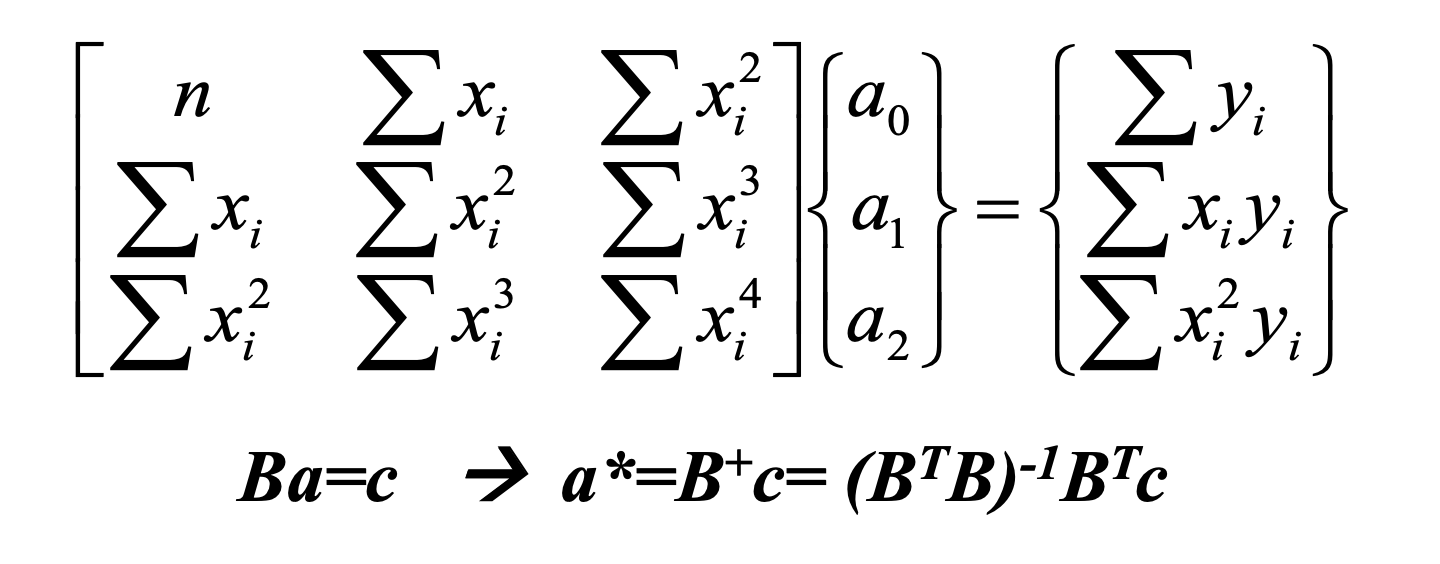

First, we generate some data for us to regress the function and evaluate the regression result.

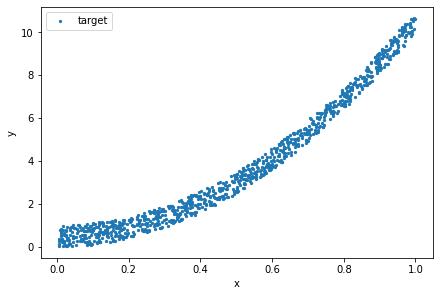

In [2]:
# Generate data to fit the quadratic function
np.random.seed(42)
# x, y are the data you will use to fit the quadratic function
x = np.random.rand(1000, 1)
y = 10 * x**2 + np.random.rand(1000, 1)
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x, y, s=5, label='target')
ax.legend()

In [3]:
# todo: implement the function to find a vector (a0, a1, a2)
def fit_one_variable(x, y):
    X = expand(x, degree=2)
    X_T = X.transpose()
    B = np.dot(X_T, X)
    c = np.dot(X_T, y)
    a = np.linalg.solve(B, c)
    return a

# todo: implement the function to predict y given x and the coefficient a obtained from regression
def pred_mat(x, a):
    X = expand(x, degree=2)
    y_pred = np.dot(X, a)
    return y_pred

# You may need to use the function to expand each input datum from x to (1, x, x**2)
# degree: the degree of polynomial equation
def expand(x, degree):
    assert degree > 0, "degree should larger than 0"
    x = np.ravel(x)
    x = np.reshape(x, (x.shape[0], 1))
    x_copy = x.copy()
    for i in range(2, degree+1):
        x = np.append(x, x_copy ** i, axis=1)
    return x

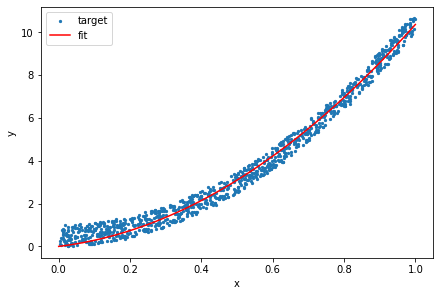

In [4]:
# todo:
# 1. fit the second order polynomial function
# 2. print the estimated coefficient rounded to two decimal places
# 3. make the prediction using x, and draw the predicted y and target y on the same figure
# Fit the quadratic function
a = fit_one_variable(x, y)

x_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = pred_mat(x_new, a)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x, y, s=5, label='target')
ax.plot(x_new, y_pred, color='red', label='fit')
ax.legend()

(b) Fitting Two-variable Quadratic Function

In the class, professor Hwang talked about how to do the second order polynomial regression of one variable. Now, we should follow the same way to do the second order polynomial regression of two vairable.


The equation shown below solves the coefficient **a** in the second order polynomial function of one variable, and can be obtained from taking the derative of sum of squares of the residual with respect to each coefficient a (a0, a1, a2). (See the course slide for more details)

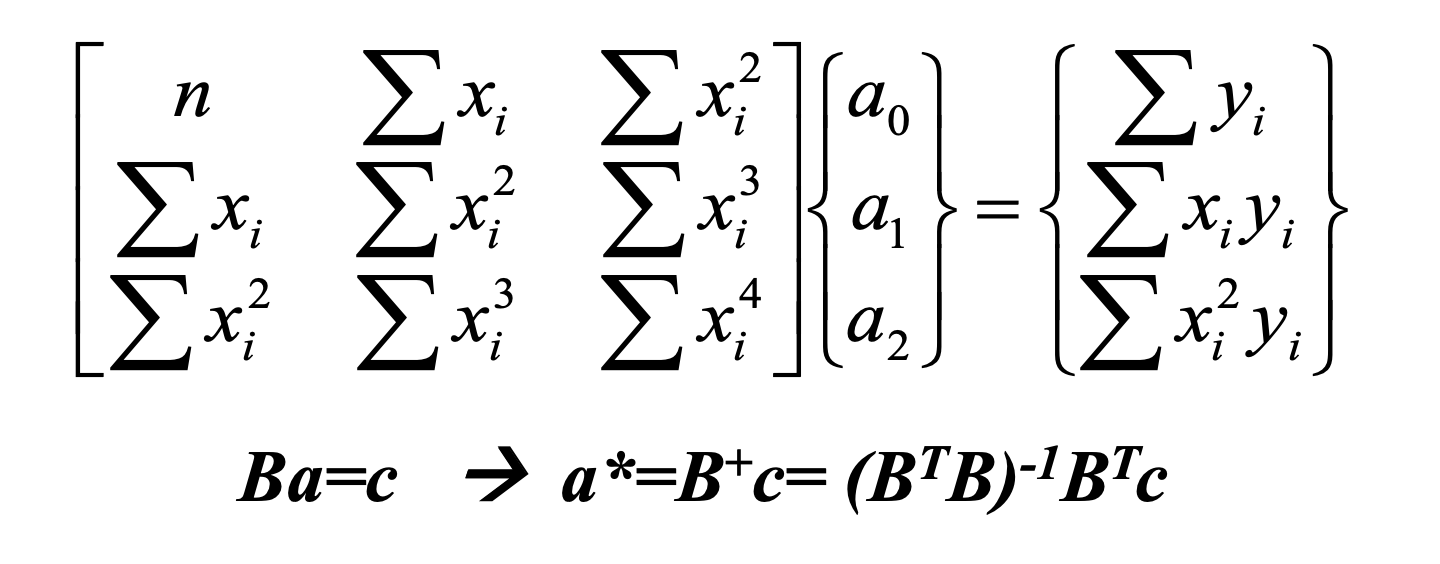

1. Now, constuct the equation (Ba=c) using a similar way for second order polynomial function of two variables. Please follow the steps below to write down the equation, Ba=c. (5%)

- Step1: Write Sr = sum of square of residual 
- Step2: Take the derative of Sr with respect to different coefficient term (a0, a1, ..., a5)
- Step3: Organize six equstion from Step2 in the matrix form (Ba=c)
- a0, a1, ..., a5 are the coefficients of two variable second order polynomial function. e is the residual





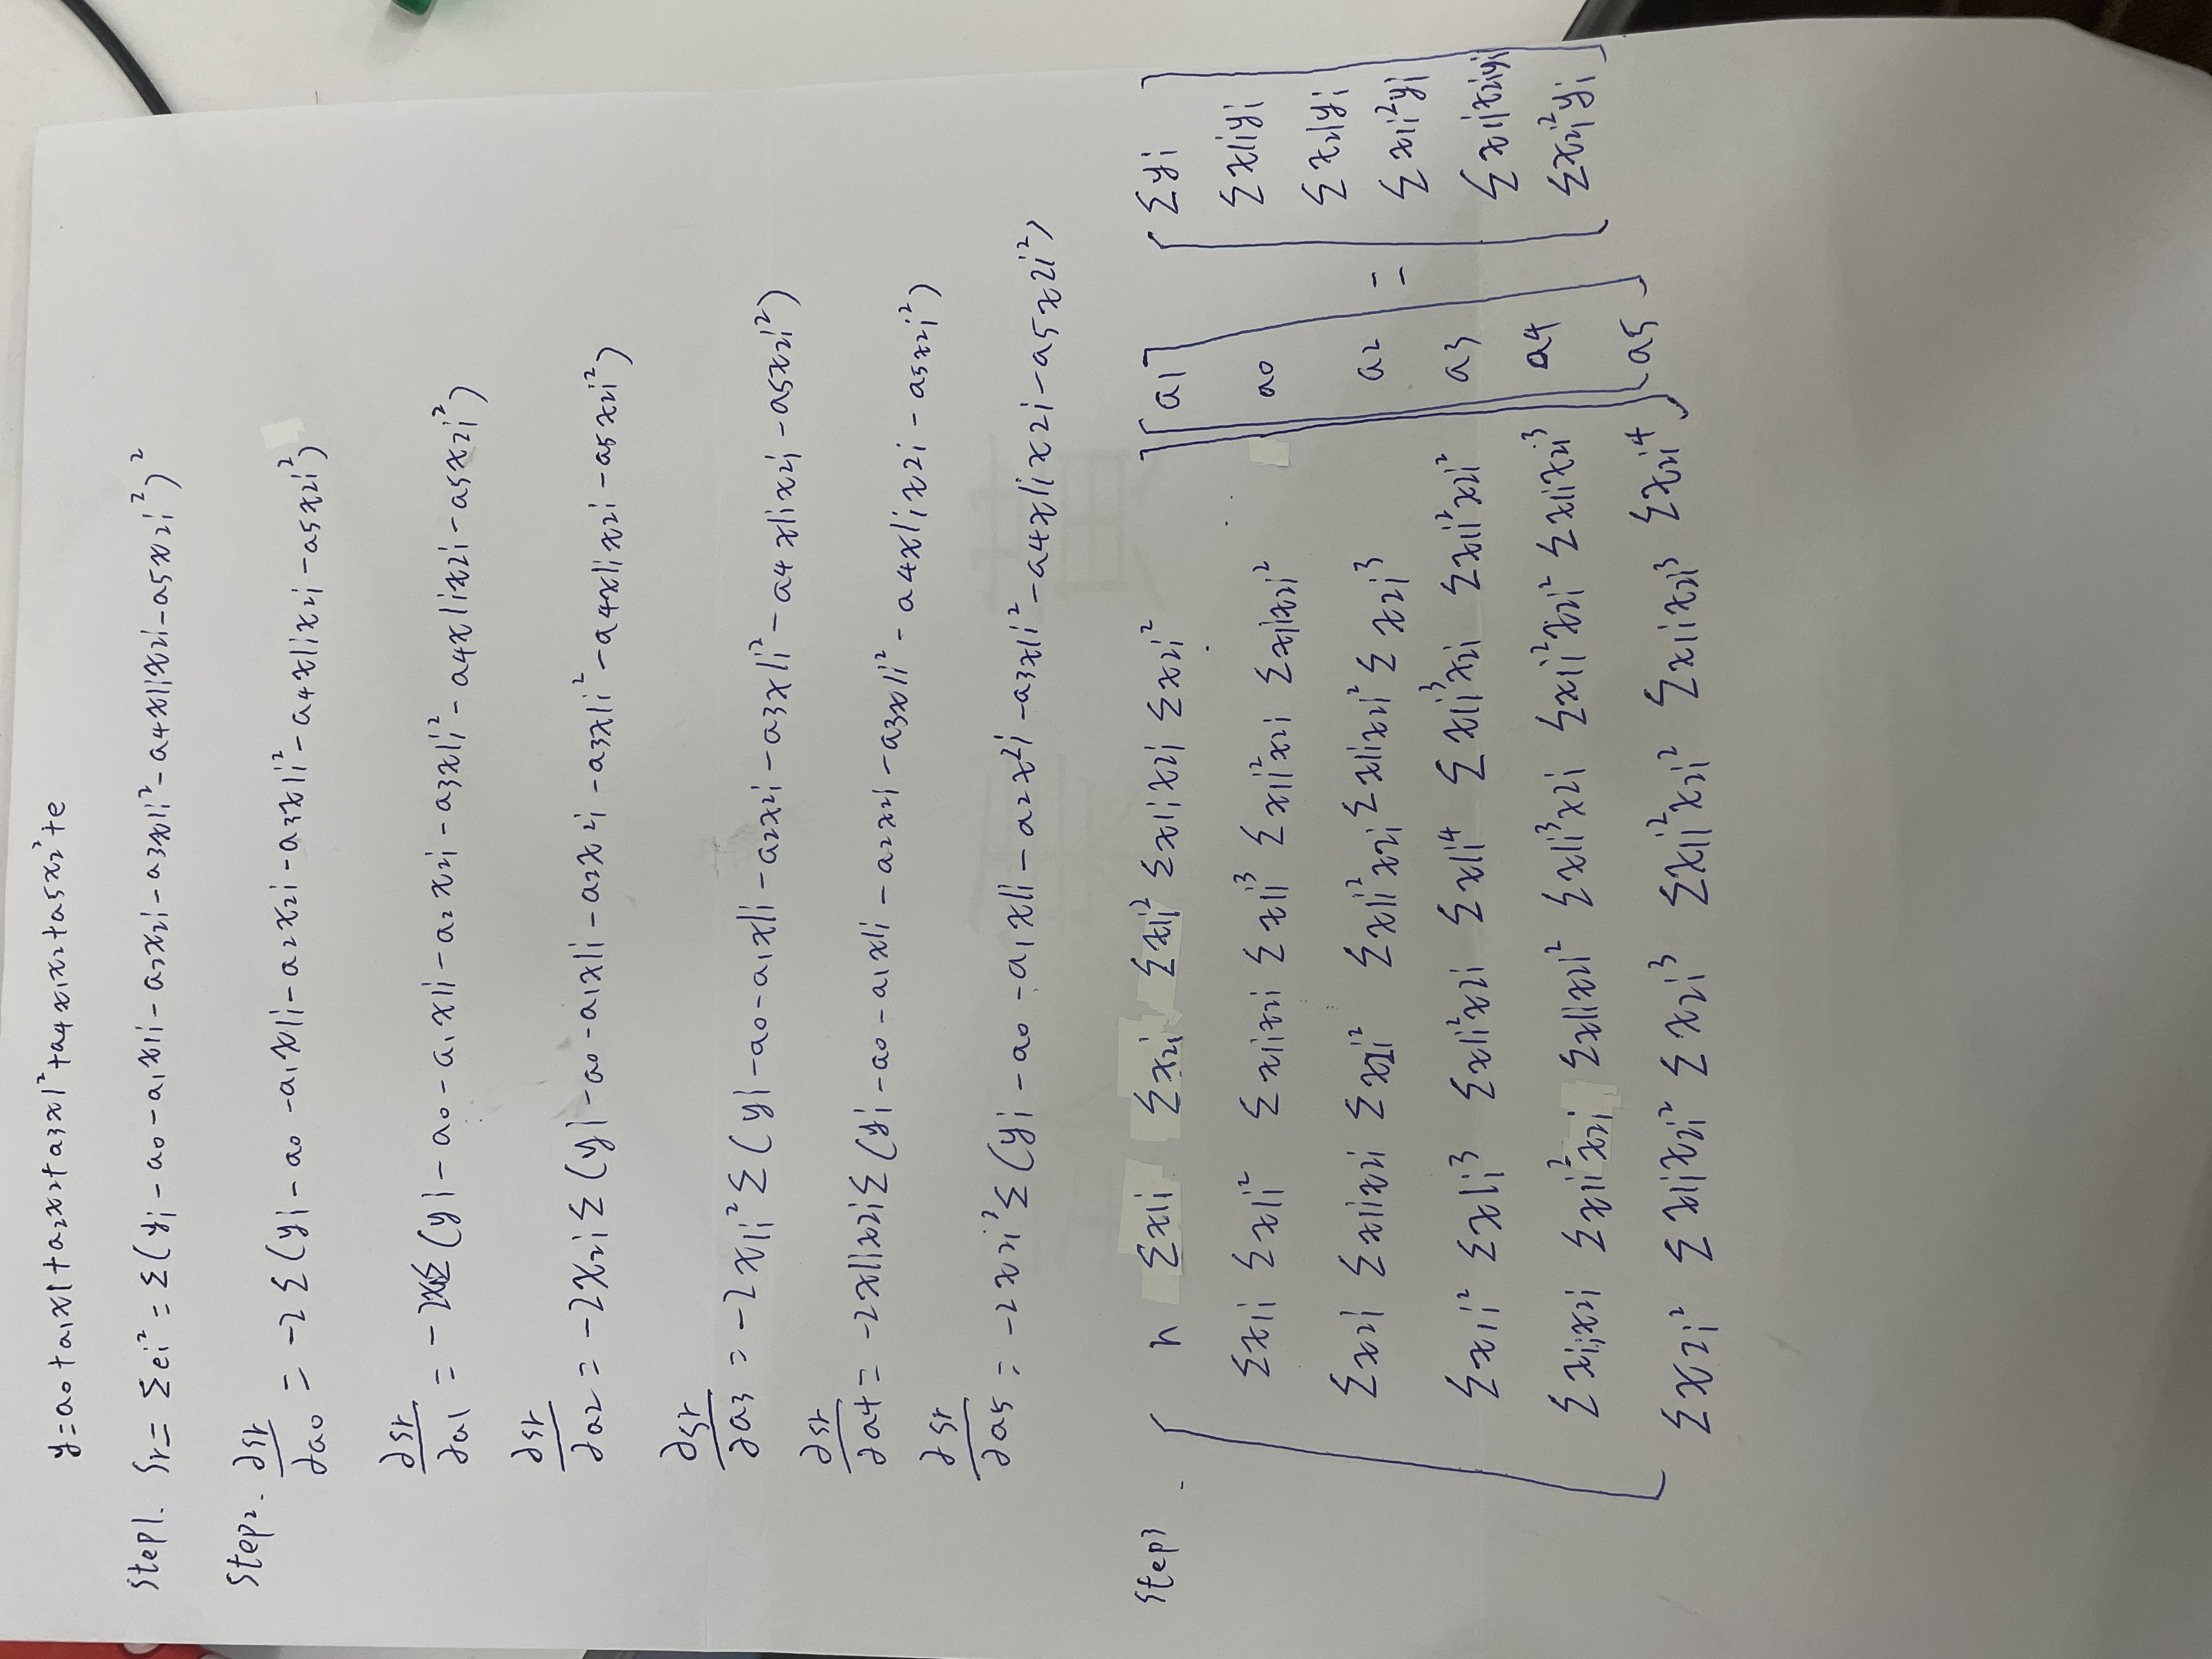

Todo: upload the image of your derivation

Now that we have **B**, **a** and **c**, we can solve **a** using the equation below similar to how we solve **a** for single variable polynomial regression.

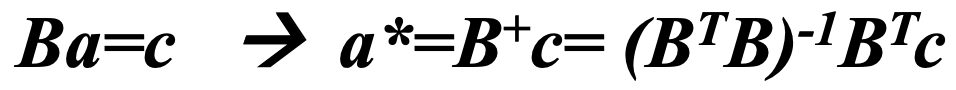

2. Implement the function to solve two variable second order polynomial regression using **B, a, c** from question b1.

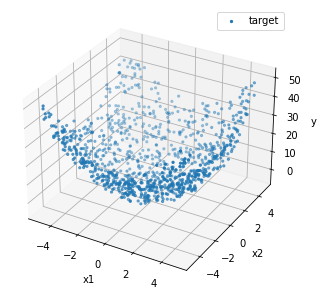

In [5]:
# Generate data to fit the quadratic function
np.random.seed(42)
x1 = np.random.rand(1000, 1) * 10. - 5.
x2 = np.random.rand(1000, 1) * 10. - 5.
y = x1**2 + x2**2  + (np.random.rand(1000, 1) - 0.5) * 10.
fig, ax = plt.subplots(1, 1, constrained_layout=True, subplot_kw={'projection': '3d'})
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y, s=5, label='target')
ax.legend()

In [6]:
# todo: implement the function to find the coefficient vector (a0, a1, a2, a3, a4, a5)
def fit_two_variable(x1, x2, y):
    X = transform_data(x1, x2)
    X_transpose = X.T
    XtX = X_transpose @ X
    XtX_inv = np.linalg.inv(XtX)
    Xty = X_transpose @ y
    a = XtX_inv @ Xty
    return a

# You may need to use this function to transform the data
def transform_data(x1, x2):
    return np.concatenate((np.ones_like(x1), x1, x2, x1**2, x2**2, x1*x2), axis=1)

# todo: implement the function to make prediction
def pred_two_var(a, x1, x2):
    X = transform_data(x1, x2)
    y_pred = X @ a
    return y_pred

Coefficients: [[-0.03]
 [ 0.01]
 [ 0.03]
 [ 1.  ]
 [ 1.  ]
 [ 0.01]]


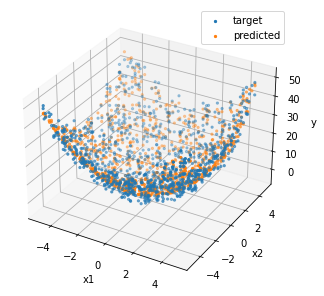

In [7]:
# todo:
# 1. fit the second order polynomial function
# 2. print the estimated coefficient rounded to two decimal places
# 3. make the prediction using x1 and x2, and draw the predicted y and target y on the same figure
a = fit_two_variable(x1, x2, y)

print('Coefficients:', np.round(a, 2))

y_pred = pred_two_var(a, x1, x2)

fig, ax = plt.subplots(1, 1, constrained_layout=True, subplot_kw={'projection': '3d'})
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.scatter3D(x1, x2, y, s=5, label='target')
ax.scatter3D(x1, x2, y_pred, s=5, label='predicted')
ax.legend()
plt.show()


## Problem 3: Classification on Digital Images Using Traditional Machine Learning (25%)

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [8]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [9]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive. 

In [10]:
from scipy.io import loadmat
mnist = loadmat('/content/gdrive/My Drive/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']

print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

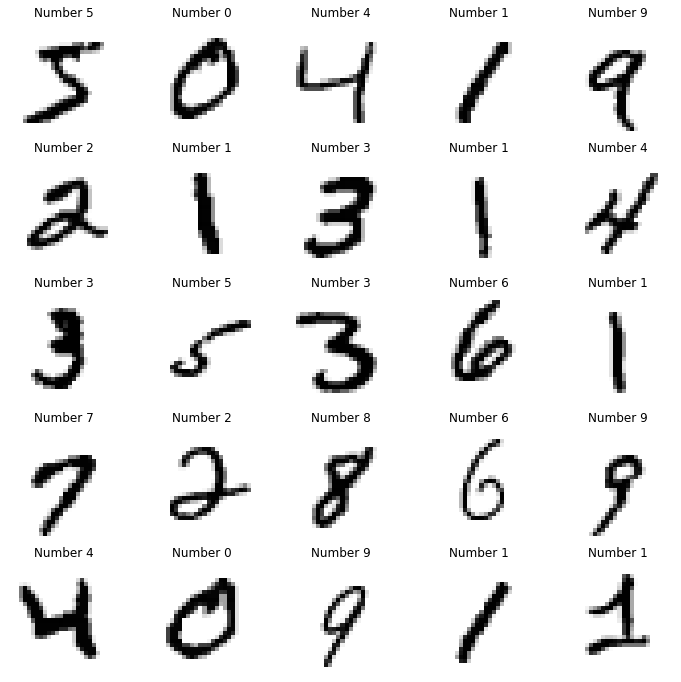

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA on MNIST

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

In [12]:
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
# TODO: implement PCA
# implement PCA to reduce data dimension

scaler = StandardScaler()
traindata_scaled = scaler.fit_transform(traindata)

cov_mat = np.cov(traindata_scaled.T)

eig_vals, eig_vecs = LA.eig(cov_mat)

eig_pairs = [(eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True, key=lambda x: x[0])


k = 12
topk_eigvecs = np.array([eig_pairs[i][1] for i in range(k)])

traindata_pca = np.dot(traindata_scaled, topk_eigvecs.T)



In [13]:
print(traindata_pca[0].shape)

(12,)


How to select a good reduced dimension k? Keep 80% information after the reduction.

### (c) Support Vector Machine (SVM) Classifier

Lets build a SVM Classifier for MNIST dataset. Here you should use the representative data (after PCA) for training and inference. For more details about using SVM, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

In [14]:
# Todo: use your PCA implementation to reduce the data dimension
# To save the training time, reduce the dimension to 12

from sklearn.svm import SVC

svm = SVC()
svm.fit(traindata_pca, trainlabels)

validdata_scaled = scaler.transform(validdata)
validdata_pca = np.dot(validdata_scaled, topk_eigvecs.T)


Implement a SVM classifier using the scikit-learn package: sklearn.svm.SVC with L2 regularization parameters C = 1.0, kernel type ‘linear’. 

In [15]:
from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='linear')

svm.fit(traindata_pca, trainlabels)

validdata_scaled = scaler.transform(validdata)
validdata_pca = np.dot(validdata_scaled, topk_eigvecs.T)
predictions = svm.predict(validdata_pca)



# todo


Evaluate the classification accuracy on the validation set. 

In [16]:
# todo: print the accuracy on the given test data and labels.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(validlabels, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8713



Try using a different kernel type, change the kernal from ‘linear’ to ‘rbf’ (radial basis function) and evaluate the classification accuracy on the validation set. Which one (‘linear’ or ‘rbf’) can give you higher accuracy? rbf get higher  accuracy

In [17]:
# todo
from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='rbf')

svm.fit(traindata_pca, trainlabels)

validdata_scaled = scaler.transform(validdata)
validdata_pca = np.dot(validdata_scaled, topk_eigvecs.T)
predictions = svm.predict(validdata_pca)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(validlabels, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.9414


Fix the kernel type to be ‘rbf’ and try different sets of regularization parameters C ∈ {0. 1, 0. 5, 1. 0, 5. 0, 10. 0}, and report all the classification accuracies on the validation set. What’s the meaning of changing the C here? Which C in your case can give your the best accurarcy? 

C is a regularization parameter affecting the relationship between support vectors and the margin. Smaller values of C lead to larger margins and fewer violations, which can potentially improve the generalization performance on the validation set but may increase the training error. On the other hand, larger values of C lead to smaller margins and more violations, which can potentially improve the training error but may decrease the generalization performance on the validation set.

In [18]:
# todo
C_list = [0.1, 0.5, 1.0, 5.0, 10.0]

for C in C_list:
  svm = SVC(C=C, kernel='rbf')

  svm.fit(traindata_pca, trainlabels)

  validdata_scaled = scaler.transform(validdata)
  validdata_pca = np.dot(validdata_scaled, topk_eigvecs.T)
  predictions = svm.predict(validdata_pca)

  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(validlabels, predictions)
  print('C =', C, ', accuracy:', accuracy)

C = 0.1 , accuracy: 0.9199
C = 0.5 , accuracy: 0.9366
C = 1.0 , accuracy: 0.9414
C = 5.0 , accuracy: 0.949
C = 10.0 , accuracy: 0.9503



Run your classifier on the testing set with the model which achieves the best performance on the validation dataset, and visualize some of the images with their predicted labels. 


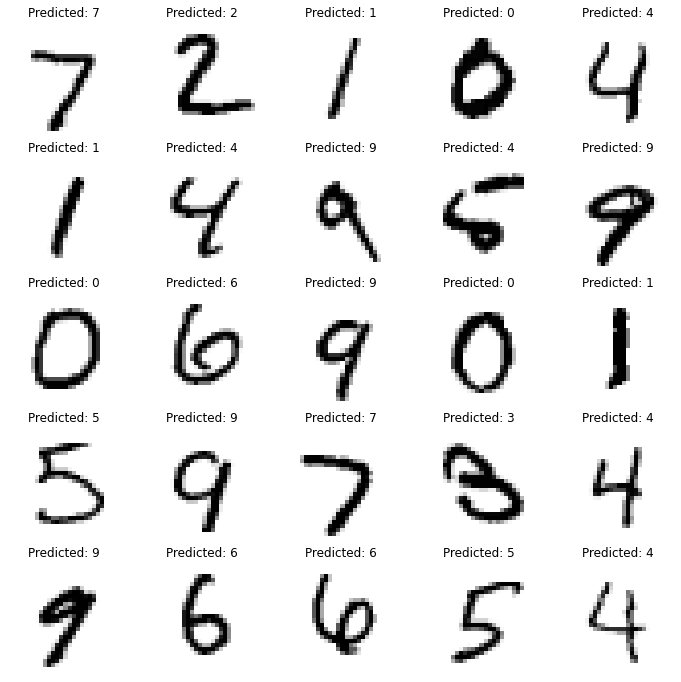

In [19]:
# todo
svm = SVC(C=10.0, kernel='rbf')
svm.fit(traindata_pca, trainlabels)

testdata_scaled = scaler.transform(testdata)
testdata_pca = np.dot(testdata_scaled, topk_eigvecs.T)
predictions = svm.predict(testdata_pca)

fig, axs = plt.subplots(5, 5, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(testdata[i].reshape((28, 28)), cmap=cm.gray_r)
    ax.axis('off')
    ax.set_title('Predicted: {}'.format(predictions[i]))

plt.show()